In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Goal

I want to show a few different ways of making the same plot, as shown below:

![](sketch.jpg)

# Data Cleaning

Firstly, let's get the four dataframes loaded into memory.

In [2]:
aapl = pd.read_csv('data/aapl.csv', parse_dates=['Date'])
aapl['ticker'] = 'AAPL'
aaba = pd.read_csv('data/aaba.csv', parse_dates=['Date'])
aaba['ticker'] = 'AABA'
msft = pd.read_csv('data/msft.csv', parse_dates=['Date'])
msft['ticker'] = 'MSFT'
goog = pd.read_csv('data/goog.csv', parse_dates=['Date'])
goog['ticker'] = 'GOOG'



data = pd.concat([aapl, aaba, msft, goog])
data.set_index('Date', inplace=True)
data.head(20)

,Open,High,Low,Close,Volume,ticker
Date,,,,,,
2017-07-11,144.73,145.85,144.38,145.53,19781836,AAPL
2017-07-10,144.11,145.95,143.37,145.06,21090636,AAPL
2017-07-07,142.90,144.75,142.90,144.18,19201712,AAPL
2017-07-06,143.02,143.50,142.41,142.73,24128782,AAPL
2017-07-05,143.69,144.79,142.72,144.09,21569557,AAPL
2017-07-03,144.88,145.30,143.10,143.50,14277848,AAPL
2017-06-30,144.45,144.96,143.78,144.02,23024107,AAPL
2017-06-29,144.71,145.13,142.28,143.68,31499368,AAPL
2017-06-28,144.49,146.11,143.16,145.83,22082432,AAPL


# Old API

The high-level API for `matplotlib` is called the `pyplot` API. It's usually called as such:

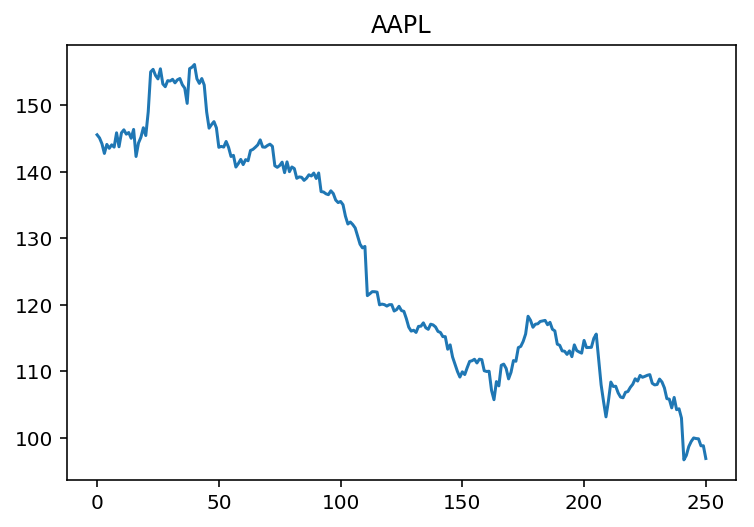

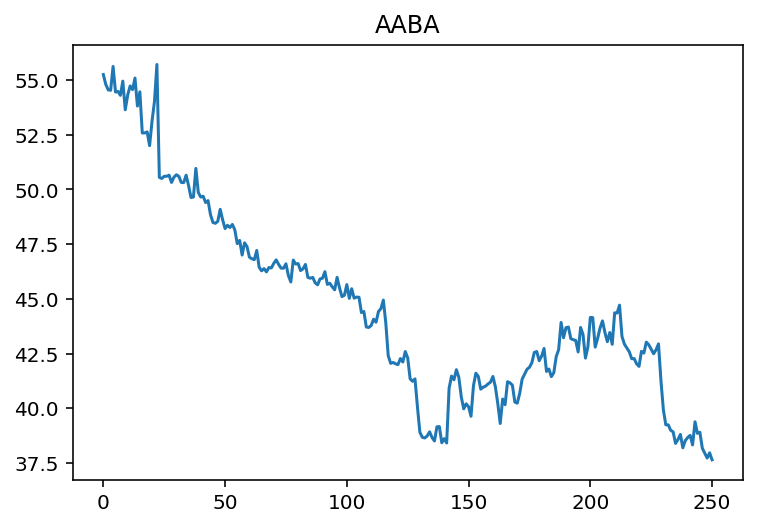

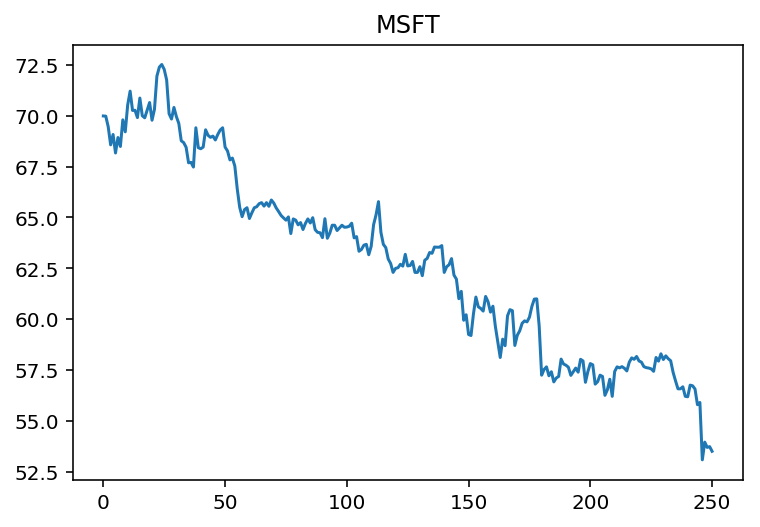

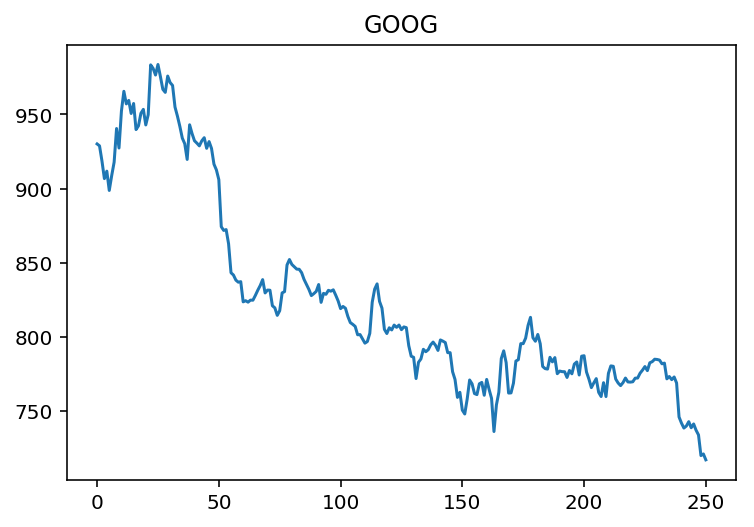

In [3]:
plt.figure()
plt.plot(aapl['Close'])
plt.title('AAPL')

plt.figure()
plt.plot(aaba['Close'])
plt.title('AABA')

plt.figure()
plt.plot(msft['Close'])
plt.title('MSFT')

plt.figure()
plt.plot(goog['Close'])
plt.title('GOOG')

We clearly aren't generating the plots as we wanted. The plots aren't kept in a grid. We need to do better.

(That said, don't discard the `plt.` API just yet! It's good for very quick-and-dirty plots that need to be made!)

# Objected Oriented API

Let's instead try using the Object-Oriented API. This will give us finer-grained control over the plotting. Knowing how to use the OO API can really expand how you make customized plots using MPL. Let's go ahead and give it a shot.

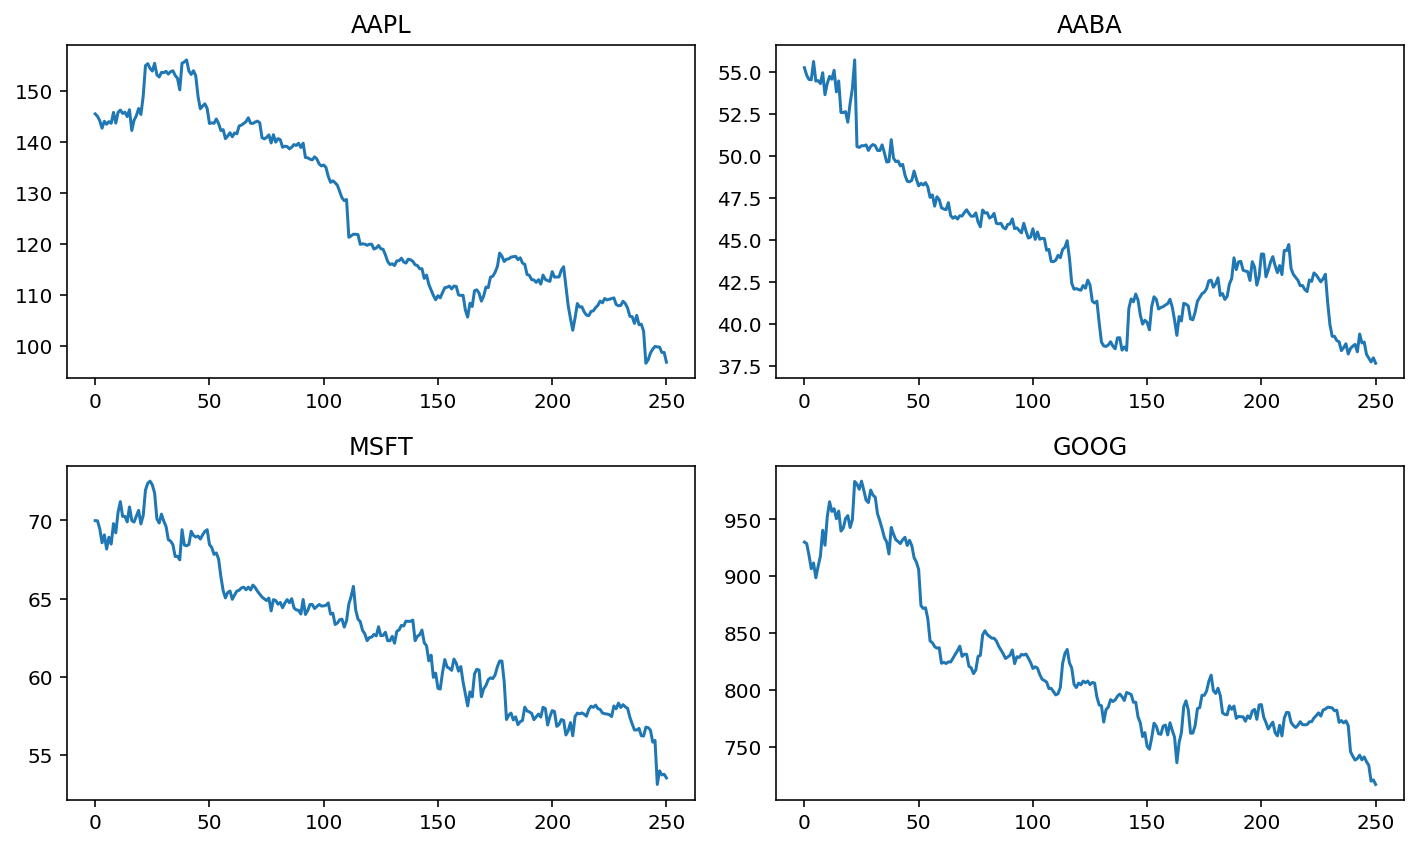

In [4]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(aapl['Close'])
ax1.set_title('AAPL')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(aaba['Close'])
ax2.set_title('AABA')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(msft['Close'])
ax3.set_title('MSFT')

ax3 = fig.add_subplot(2,2,4)
ax3.plot(goog['Close'])
ax3.set_title('GOOG')

plt.tight_layout()
plt.show()

We notice that there's a lot of repetitive code being written. As a general rule-of-thumb, if you write the same code twice, it's a good idea to think about encapsulating it inside a function.

# Function + Objects

Let's now try that. Note that with the following code, it's easily extensible to arbitrary grid dimensions.

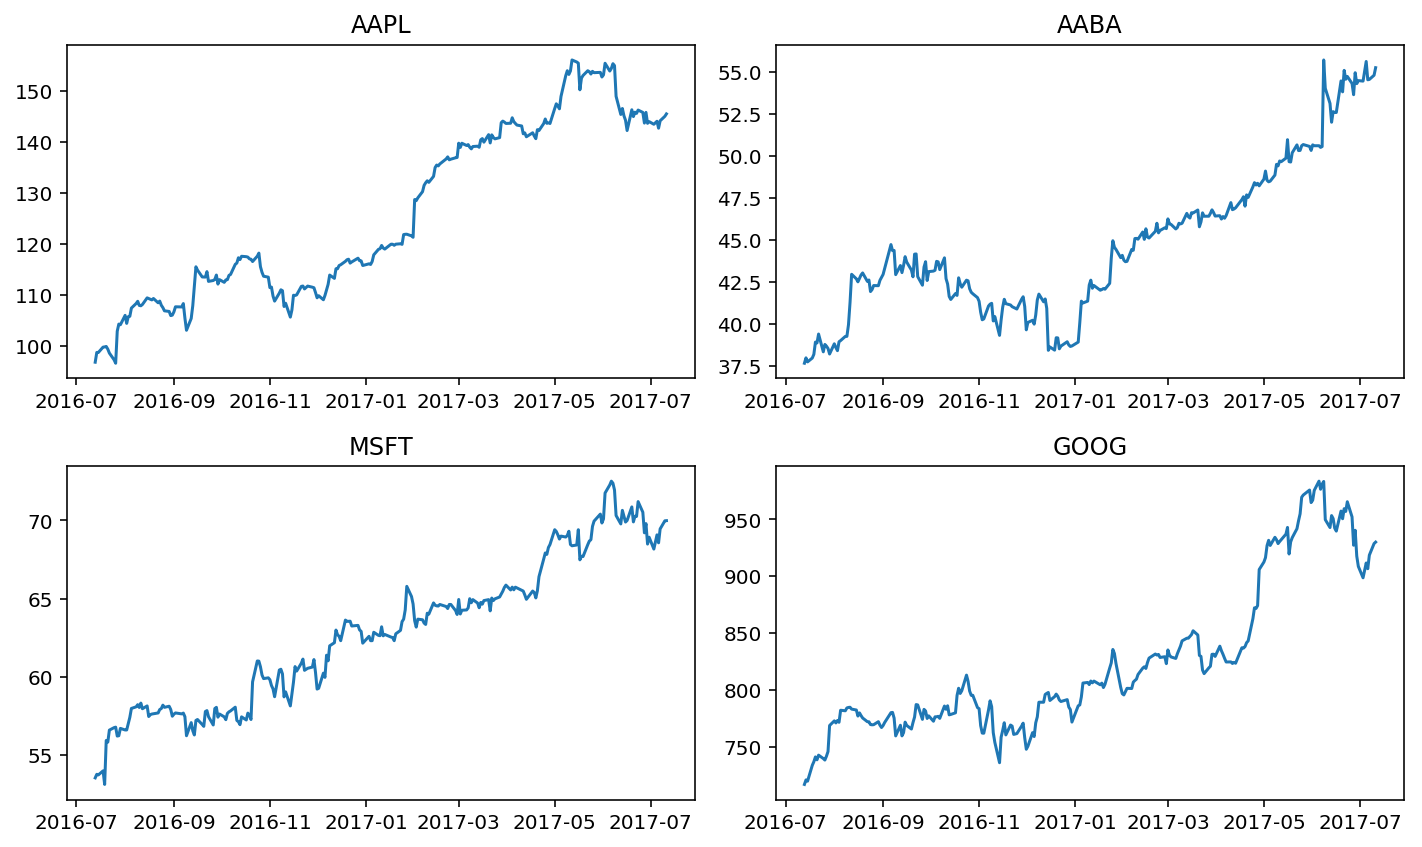

In [5]:
symbols = ['AAPL', 'AABA', 'MSFT', 'GOOG']

def plot_symbol(data, symb, ax):
    cond = data['ticker'] == symb
    ax.plot(data[cond]['Close'])
    return ax

fig = plt.figure(figsize=(10, 6))
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 2)
for i, symbol in enumerate(symbols):
    ax = fig.add_subplot(gs[i])
    ax = plot_symbol(data, symbol, ax)
    ax.set_title(symbol)
    
plt.tight_layout()
plt.show()